In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('MLW_Data.csv', delimiter=',' ,encoding='cp1252')
df.dataframeName = 'MLW_Data.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 3413 rows and 176 columns


In [4]:
df.head(10)

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,...,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
0,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20160310,Cleanup,NaN,...,2.0,4.0,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN
1,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20150902,Cleanup,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20151203,Cleanup,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN,2.0,1.0
3,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20151008,Cleanup,NaN,...,5.0,NaN,2.0,NaN,NaN,NaN,5.0,26.0,NaN,NaN
4,Legambiente Onlus,San Mauro Cilento (SA),IT,Unknown,100,NaN,NaN,20180428,Monitoring,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
5,Legambiente Onlus,"Spiaggia sul Lungomare Falcomat?, Reggio Calab...",IT,Mediterranean Sea,100,NaN,NaN,20160514,Cleanup,NaN,...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
6,Surfrider Foundation Europe,"7 Place Salvador Allende, 94000 Cr?teil, France",NaN,Unknown,750,NaN,NaN,20190519,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,0.0
7,Swiss Litter Report,zürichsee_wollishofen_langendorfm,CH,NaN,50,Urban,Rocky,20170618,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
8,HELMEPA - Hellenic Marine Environment Protecti...,"Agia Galini, Crete (port)",GR,Mediterranean Sea,84,Near river mouth,Rocky,20141005,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
9,Legambiente Onlus,"Spiaggia della Bandita, Palermo (PA)",IT,Mediterranean Sea,100,NaN,NaN,20140518,Cleanup,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2 = pd.read_csv('MLW_Meta.csv', delimiter=',' ,encoding='cp1252')
df2.dataframeName = 'MLW_Meta.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 164 rows and 3 columns


In [7]:
df2.head(10)

,generalcode,category,generalname
0,G1,Plastic,"4/6-pack yokes, six-pack rings"
1,G3,Plastic,Shopping Bags incl. pieces
2,G4,Plastic,"Small plastic bags, e.g. freezer bags incl. pi..."
3,G5,Plastic,Plastic bags collective role; what remains fro...
4,G7,Plastic,Drink bottles <=0.5l
5,G8,Plastic,Drink bottles >0.5l
6,G9,Plastic,Cleaner bottles & containers
7,G10,Plastic,Food containers incl. fast food containers
8,G11,Plastic,Beach use related cosmetic bottles and contain...
9,G12,Plastic,Other cosmetics bottles & containers


In [8]:
df.shape

(3413, 176)

In [9]:
df2.shape

(164, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Columns: 176 entries, CommunityName to G213
dtypes: float64(166), int64(2), object(8)
memory usage: 4.6+ MB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 3 columns):
generalcode    164 non-null object
category       164 non-null object
generalname    164 non-null object
dtypes: object(3)
memory usage: 4.0+ KB


In [17]:
# Reviewing Missing Data
df.isna().sum()

CommunityName          0
BeachName              0
BeachCountrycode     249
BeachRegionalSea    1113
BeachLength_m          0
                    ... 
G207                3294
G208                1337
G210                2430
G211                2463
G213                2350
Length: 176, dtype: int64

In [18]:
# Reviewing Missing Data
df2.isna().sum()

generalcode    0
category       0
generalname    0
dtype: int64

In [19]:
# calculate sum of all duplicated value
df.duplicated().sum()

12

In [20]:
# calculate sum of all duplicated value
df2.duplicated().sum()

0

In [21]:
# Top 10 Neighborhoods
df['BeachType'].value_counts().head(10)

Sandy            732
Pebbels          398
Other (mixed)    384
Rocky            174
Name: BeachType, dtype: int64

In [22]:
# Top 10 Communities
df['CommunityName'].value_counts().head(10)

Swiss Litter Report                                        1061
Surfrider Foundation Europe                                 664
gBqsPxAZ                                                    308
Monitoraggio Strategia Marina – Ministero dell’Ambiente     254
Marnoba                                                     239
Legambiente Onlus                                           195
Aarhus University, Denmark                                  129
Mare Nostrum                                                 79
DeFishGear - Slovenia                                        73
Perseus                                                      69
Name: CommunityName, dtype: int64

In [24]:
# Top 10 Beach Names
df['BeachName'].value_counts().head(10)

Thur_Schoenenberg_SchaerA                               58
Risø, Roskilde bredning                                 24
MSFD Nymindegab                                         18
MSFD Skagen                                             18
MSFD Kofoeds enge                                       18
MSFD Pomlenakke, Falster                                18
rhein_laag_jungbluthn                                   18
Murg_Waengi_StrickerR                                   15
Passeig del Mare Nostrum, 15, 08039 Barcelona, Spain    15
Inn_Pradella_KohlT                                      13
Name: BeachName, dtype: int64

In [27]:
# Top 20 Beach Country Codes
df['BeachCountrycode'].value_counts().head(20)

CH     985
IT     511
ES     366
FR     316
DK     256
RO     145
DE      89
SI      77
BG      74
GR      67
UK      55
IE      42
PT      25
Int     23
RU      21
GE      20
TR      20
NL      10
CY       8
HR       7
Name: BeachCountrycode, dtype: int64

In [29]:
# Top 5 Regional Seas
df['BeachRegionalSea'].value_counts().head(5)

Mediterranean Sea            1006
North-east Atlantic Ocean     820
Black Sea                     268
Unknown                       110
Baltic Sea                     96
Name: BeachRegionalSea, dtype: int64

In [70]:
for col in [col for col in object_cols if col!='BeachName']:
    print(col, df1[col].unique().tolist())
    print("\n")

CommunityName ['gBqsPxAZ', 'Legambiente Onlus', 'Surfrider Foundation Europe', 'Swiss Litter Report', 'HELMEPA - Hellenic Marine Environment Protection Association', 'Black Sea NGO Network || MELTEMI', 'EMBLAS', 'Monitoraggio Strategia Marina – Ministero dell’Ambiente', 'MELTEMI BalkanMed', 'Marnoba', 'Plastic Change', 'Coder Dojo Dunmore East', 'Archipelagos Institute of Marine Conservation', 'Mare Nostrum', 'UkrSCES Institution', 'European Environment Agency (EEA)', 'Hold Danmark Rent', 'Surfers Against Sewage', 'Aarhus University, Denmark ', 'Perseus', 'DeFishGear - Slovenia', 'Clean Coasts', 'Mediterranean Information Office for Environment, Culture and Sustainable Development (MIO-ECSDE)', 'HCMR@School', 'OceanCare Cleanups', 'Anemone', 'NIMRD Grigore Antipa', 'KYMA', 'WWF Denmark', 'GEO BSMARINELITTER', 'UK Marine Conservation Society', 'Portuguese Association for Marine Litter - APLM', 'eXXpedition', 'ICES Secretariat', 'Mediterranean Microplastics Project (MMP)', 'Keep Sweden T

In [80]:
df_cleaned = df.copy()

In [81]:
df_cleaned.head()

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,...,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
0,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20160310,Cleanup,NaN,...,2.0,4.0,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN
1,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20150902,Cleanup,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20151203,Cleanup,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN,2.0,1.0
3,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,20151008,Cleanup,NaN,...,5.0,NaN,2.0,NaN,NaN,NaN,5.0,26.0,NaN,NaN
4,Legambiente Onlus,San Mauro Cilento (SA),IT,Unknown,100,NaN,NaN,20180428,Monitoring,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN


In [59]:
df_cleaned['EventDate'] = pd.to_datetime(df_cleaned.EventDate.astype(str), format='%Y%m%d')
df_cleaned['EventDate'].head()

0   2016-03-10
1   2015-09-02
2   2015-12-03
3   2015-10-08
4   2018-04-28
Name: EventDate, dtype: datetime64[ns]

In [60]:
df_cleaned

,CommunityName,BeachName,BeachCountrycode,BeachRegionalSea,BeachLength_m,BeachLocation,BeachType,EventDate,EventType,NatRef,...,G202,G203,G204,G205,G206,G207,G208,G210,G211,G213
0,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2016-03-10,Cleanup,NaN,...,2.0,4.0,NaN,3.0,NaN,NaN,3.0,NaN,1.0,NaN
1,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2015-09-02,Cleanup,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,7.0,3.0,NaN,NaN
2,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2015-12-03,Cleanup,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,2.0,NaN,2.0,1.0
3,gBqsPxAZ,krapetz,BG,Black Sea,5850,Rural,Sandy,2015-10-08,Cleanup,NaN,...,5.0,NaN,2.0,NaN,NaN,NaN,5.0,26.0,NaN,NaN
4,Legambiente Onlus,San Mauro Cilento (SA),IT,Unknown,100,NaN,NaN,2018-04-28,Monitoring,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3408,Legambiente Onlus,"Spiaggia di Marina di Montemarciano, Ancona (AN)",IT,Mediterranean Sea,100,NaN,NaN,2016-05-05,Monitoring,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3409,Surfrider Foundation Europe,"La Lagune, 33260 La Teste de Buch, FRANCE",FR,North-east Atlantic Ocean,548,NaN,NaN,2018-06-02,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3410,Surfers Against Sewage,Bournemouth beach,UK,North-east Atlantic Ocean,2302,Urban,Sandy,2015-03-28,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
3411,ocean-R-evolution.com,cleanuptravels.com,CH,NaN,22,Rural,Sandy,2017-03-15,Cleanup,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [82]:
df_cleaned.BeachCountrycode[df_cleaned.BeachRegionalSea=='Unknown'].value_counts()[:5]

IT    11
ES     5
CV     4
RU     1
CH     1
Name: BeachCountrycode, dtype: int64

In [83]:
df_cleaned.BeachCountrycode[df_cleaned.BeachRegionalSea.isna()].value_counts()[:5]

CH     984
DE      84
Int     20
FR       5
ZA       4
Name: BeachCountrycode, dtype: int64

Fill None values on BeachLocation, and BeachType with most frequent value

In [84]:
print(df_cleaned.BeachLocation.value_counts(dropna=False))
print('\n')
print(df_cleaned.BeachType.value_counts(dropna=False))

NaN                 1747
Rural                809
Urban                734
Near river mouth     123
Name: BeachLocation, dtype: int64


NaN              1725
Sandy             732
Pebbels           398
Other (mixed)     384
Rocky             174
Name: BeachType, dtype: int64


In [85]:
# impute with most frequent value
df_cleaned['BeachLocation'].fillna(df_cleaned['BeachLocation'].mode()[0], inplace=True)
df_cleaned['BeachType'].fillna(df_cleaned['BeachType'].mode()[0], inplace=True)

In [86]:
nans = pd.DataFrame(df_cleaned.isna().sum())
nans.columns=['count']
nans.sort_values(by='count', ascending=False, inplace=True)
thres = 0.95
nans['thres']= nans['count'] >= int(thres*df_cleaned.shape[0])
g_toremove = nans[nans['thres']].index.tolist()
g_tokeep = [col for col in df_cleaned.columns if 'G' in col and col not in g_toremove]

In [87]:
df_cleaned.drop(g_toremove + ['CommunityName', 'BeachName', 'NatRef'], axis=1, inplace=True)

In [88]:
df_cleaned.drop_duplicates(inplace=True)

In [89]:
print("Old df shape: %s and cleaned df shape: %s" % (df.shape, df_cleaned.shape))

Old df shape: (3413, 176) and cleaned df shape: (3399, 145)


In [90]:
g_category_dict.keys()

dict_keys(['Plastic', 'Rubber', 'Cloth/textile', 'Paper/Cardboard', 'Processed/worked wood', 'Metal', 'Glass/ceramics', 'unidentified', 'Chemicals'])

In [91]:
def plotPerColumnDistribution(df_cleaned, nGraphShown, nGraphPerRow):
    nunique = df_cleaned.nunique()
    df_cleaned = df_cleaned[[col for col in df_cleaned if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df_cleaned.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df_cleaned.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

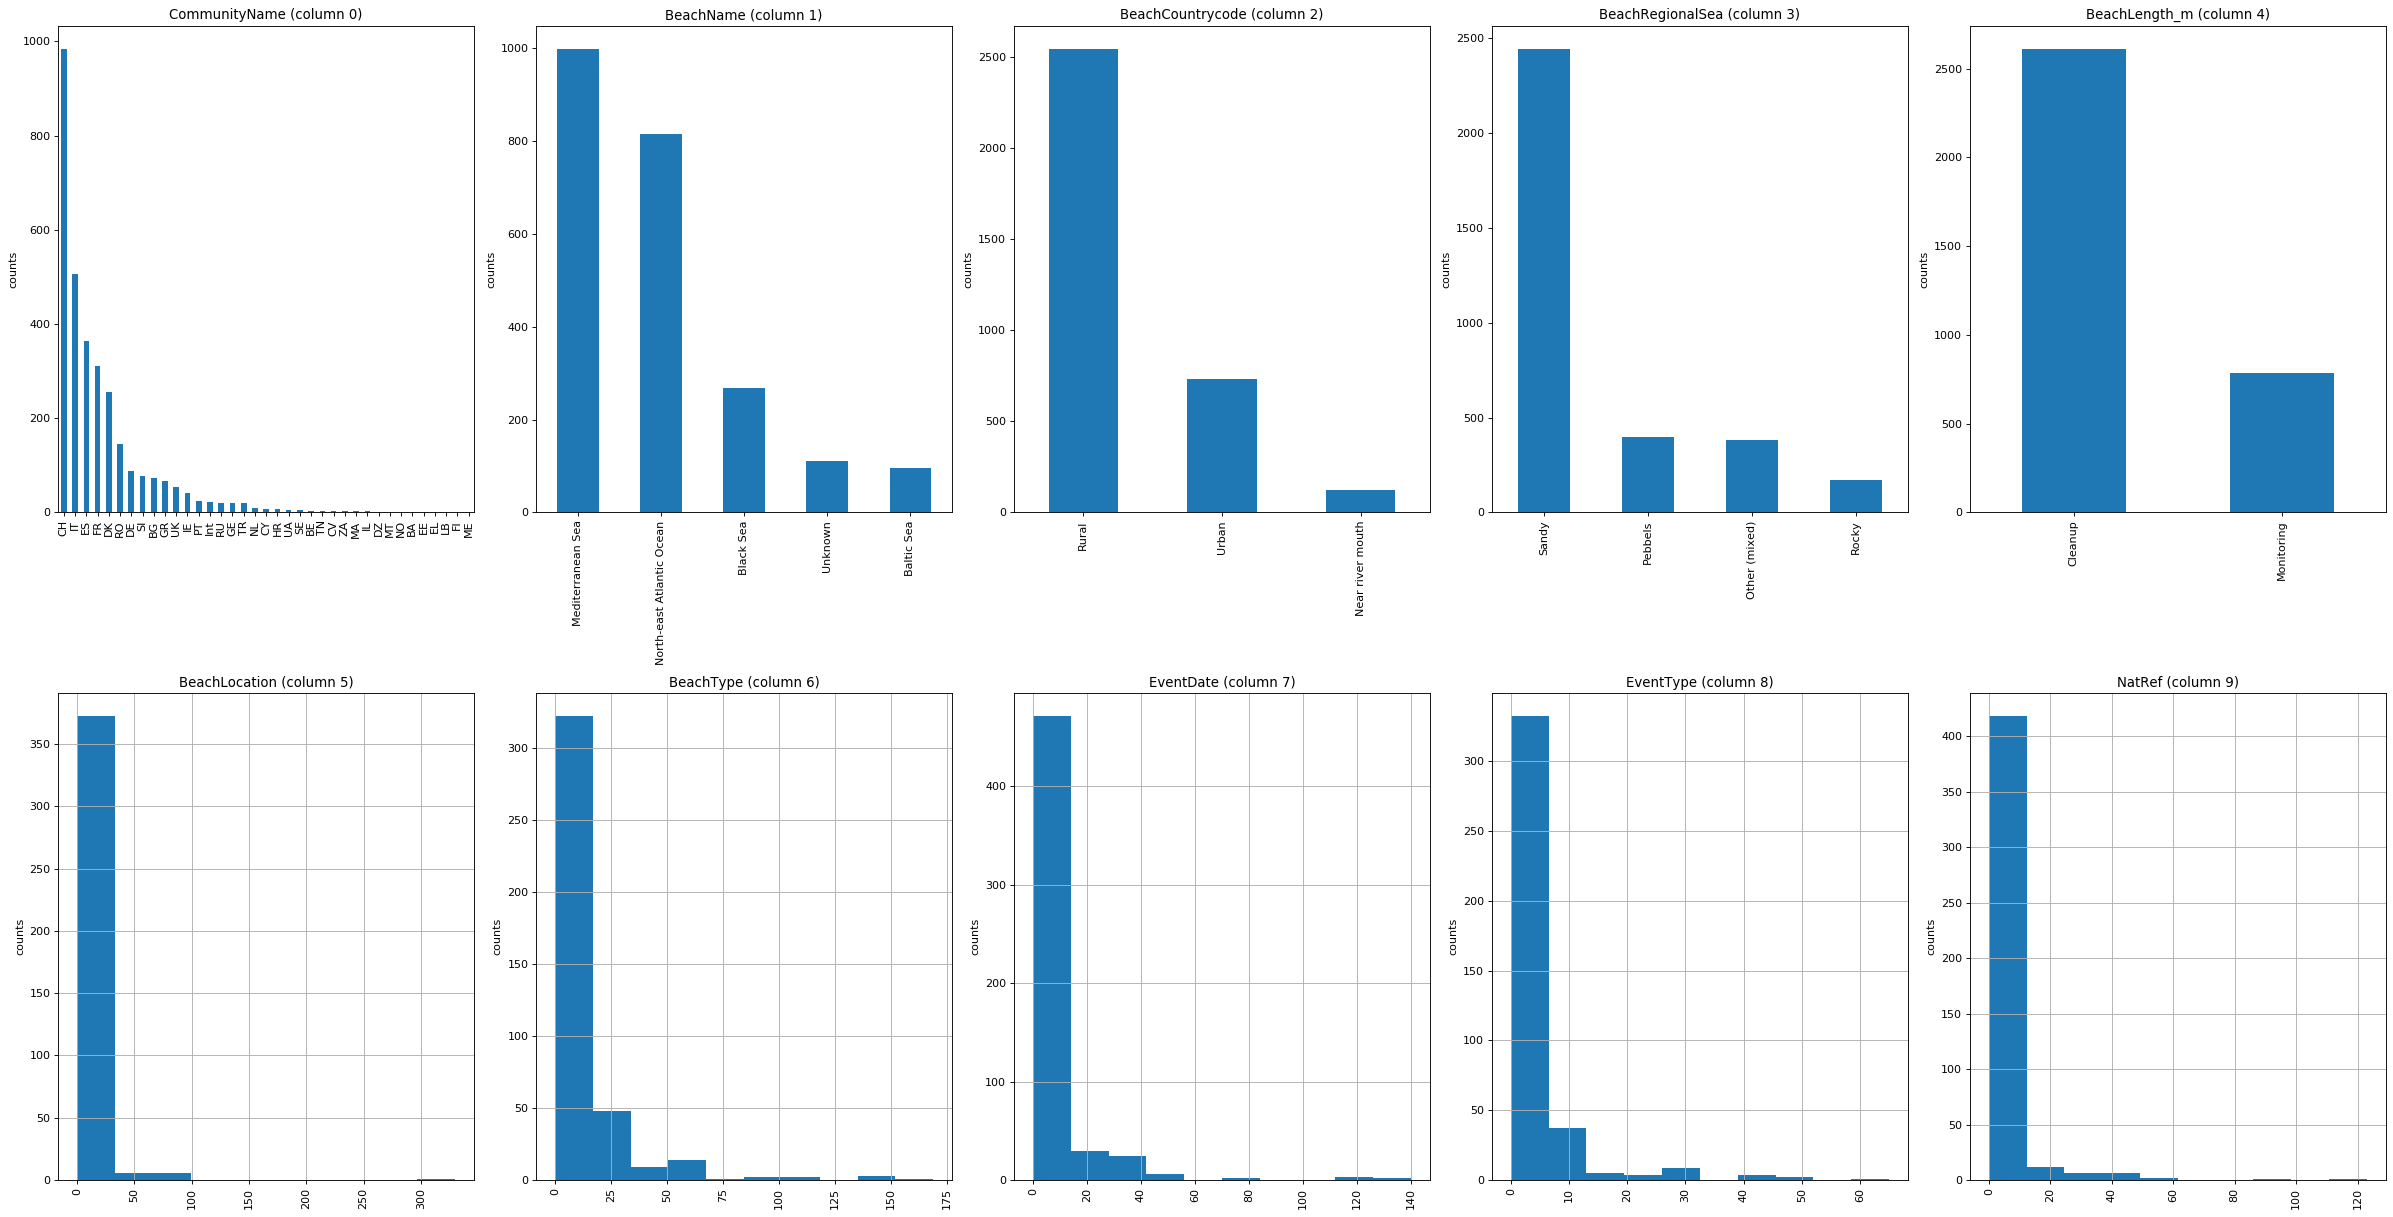

In [92]:
plotPerColumnDistribution(df_cleaned, 10, 5)

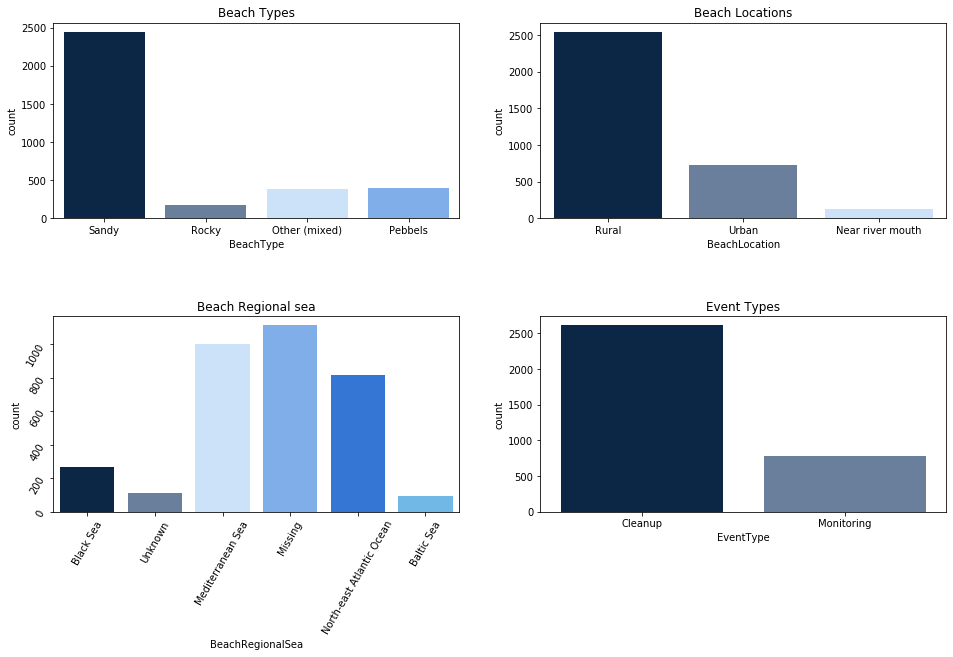

In [93]:
colours = ['#02274f', '#627ea4', '#c4e2ff', '#6dacfb', '#1a71ef', '#5dbcfb']
f,ax=plt.subplots(2,2,figsize=(16,9))
sns.countplot(x= df_cleaned.fillna('Missing')["BeachType"],ax=ax[0,0],palette = colours)
ax[0,0].set_title('Beach Types')
sns.countplot(x= df_cleaned.fillna('Missing')["BeachLocation"],ax=ax[0,1],palette = colours)
ax[0,1].set_title('Beach Locations')
sns.countplot(x= df_cleaned.fillna('Missing')["BeachRegionalSea"],ax=ax[1,0],palette = colours)
ax[1,0].tick_params(labelrotation=60)
ax[1,0].set_title('Beach Regional sea')
sns.countplot(x= df_cleaned.fillna('Missing')["EventType"],ax=ax[1,1],palette = colours)
ax[1,1].set_title('Event Types')  
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [94]:
non_g_cols = [col for col in df_cleaned.columns if 'G' not in col]
g_cols = list(set(df_cleaned.columns)-set(non_g_cols))

object_cols = [col for col in non_g_cols if df_cleaned[col].dtype==object]
for col in object_cols:
    print("Column %s has %d unique values, and %d missing values" % (col, df_cleaned[col].nunique(), df_cleaned[col].isna().sum()))

Column BeachCountrycode has 37 unique values, and 249 missing values
Column BeachRegionalSea has 5 unique values, and 1112 missing values
Column BeachLocation has 3 unique values, and 0 missing values
Column BeachType has 4 unique values, and 0 missing values
Column EventType has 2 unique values, and 0 missing values


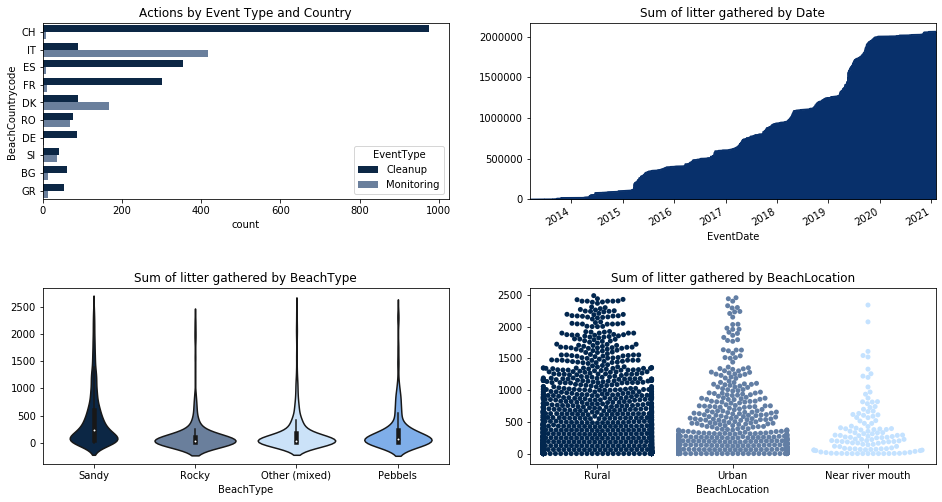

In [95]:
f,ax=plt.subplots(2,2,figsize=(16,9))
sns.countplot(y="BeachCountrycode", hue="EventType", data=df_cleaned, order=df_cleaned.BeachCountrycode.value_counts().iloc[:10].index, ax=ax[0,0], palette = colours)
ax[0,0].set_title('Actions by Event Type and Country')
df_cleaned.set_index(pd.to_datetime(df_cleaned.EventDate.astype(str), format='%Y%m%d')).sort_index()[g_cols].sum(axis=1).cumsum().plot(kind='area', colormap='Blues_r', ax=ax[0,1])
ax[0,1].set_title('Sum of litter gathered by Date')
sns.violinplot(x=df_cleaned.BeachType, y=df_cleaned[g_cols].sum(axis=1)[df_cleaned[g_cols].sum(axis=1)<2500], palette = colours, ax=ax[1,0])
ax[1,0].set_title('Sum of litter gathered by BeachType')
sns.swarmplot(x=df_cleaned.BeachLocation, y=df_cleaned[g_cols].sum(axis=1)[df_cleaned[g_cols].sum(axis=1)<2500],palette = colours, ax=ax[1,1])
ax[1,1].set_title('Sum of litter gathered by BeachLocation')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [96]:
g_category_dict = {}
for cat in df2.category.unique():
    g_category_dict[cat] = df2[df2['category']==cat]['generalcode'].tolist()
g_category_dict['Cloth/textile'] = g_category_dict['Cloth/textile'][:-2]

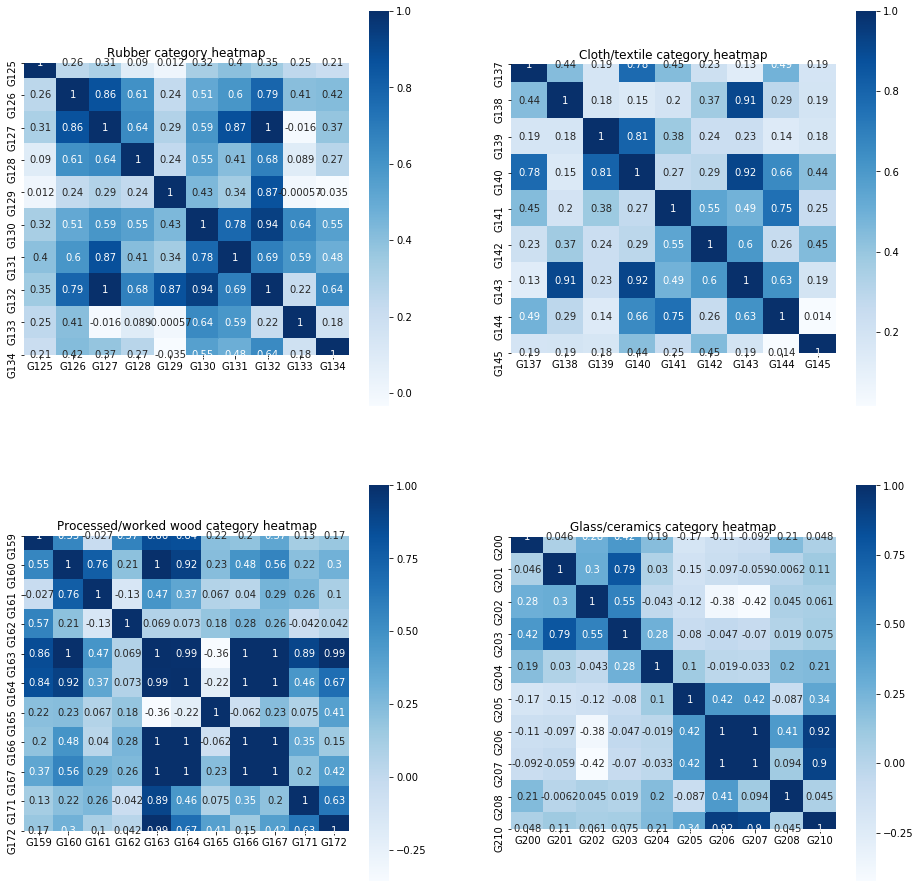

In [100]:
f,ax=plt.subplots(2,2,figsize=(16,16))
sns.heatmap(df[g_category_dict['Rubber']].corr(),cmap= "Blues",annot=True, square=True, ax=ax[0,0])
ax[0,0].set_title('Rubber category heatmap')
sns.heatmap(df[g_category_dict['Cloth/textile']].corr(),cmap= "Blues",annot=True, square=True, ax=ax[0,1])
ax[0,1].set_title('Cloth/textile category heatmap')
sns.heatmap(df[g_category_dict['Processed/worked wood']].corr(),cmap= "Blues",annot=True, square=True, ax=ax[1,0])
ax[1,0].set_title('Processed/worked wood category heatmap')
sns.heatmap(df[g_category_dict['Glass/ceramics']].corr(),cmap= "Blues",annot=True, square=True, ax=ax[1,1])
ax[1,1].set_title('Glass/ceramics category heatmap')
plt.show()

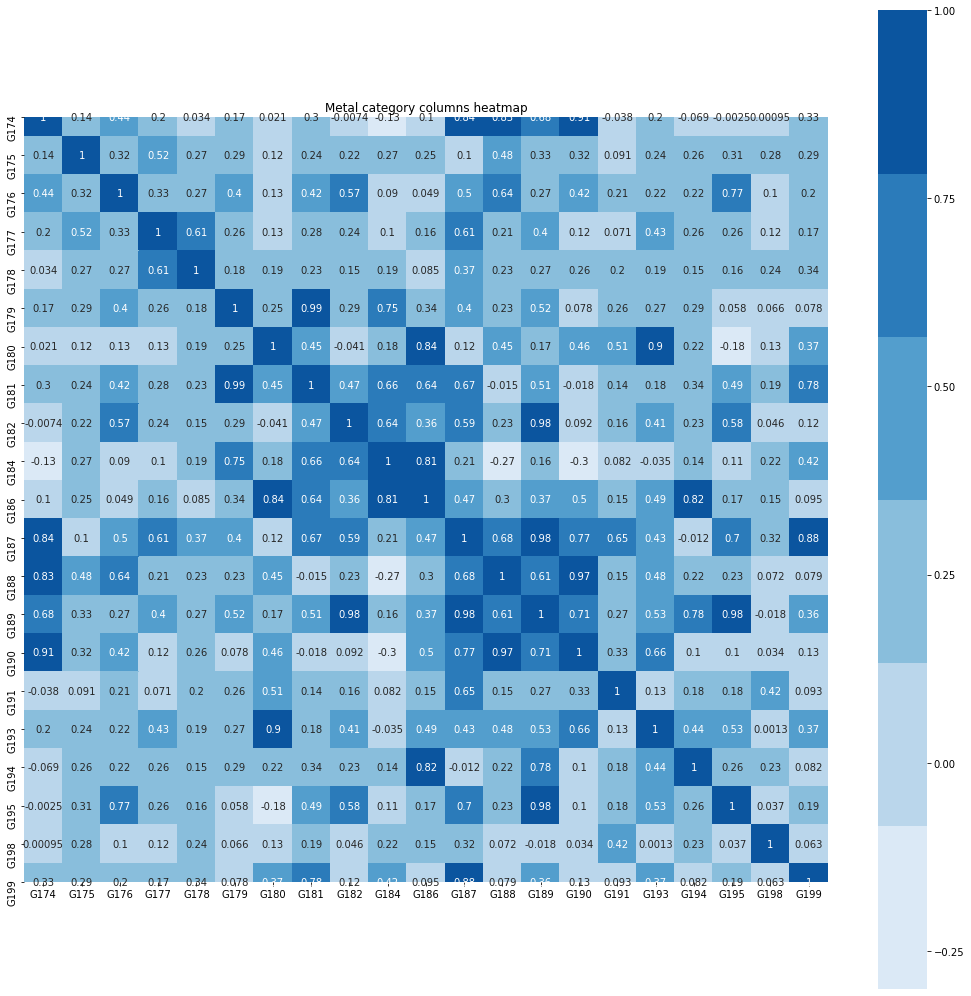

In [101]:
corrmat = df[g_category_dict['Metal']].corr()
cmap=sns.color_palette("Blues")
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)
plt.title('Metal category columns heatmap')
plt.show()

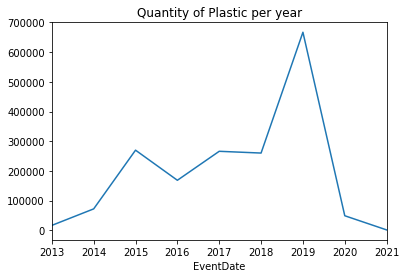

In [102]:
ax=plt.figure()
df[g_category_dict['Plastic']].groupby(pd.to_datetime(df.EventDate.astype(str), format='%Y%m%d').dt.year).sum().sum(axis=1).plot(title='Quantity of Plastic per year')
plt.show()

In [103]:
plastic = int(df[g_category_dict['Plastic']].sum().sum())
print('Total liters of Plastic gathered is: '   f'{plastic:,}')

Total liters of Plastic gathered is: 1,768,893
